In [1]:
### CONVERT ALL IMAGES TO PNG

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import math
%matplotlib inline
from __future__ import print_function
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img

from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import DenseNet121
from keras.applications.densenet import DenseNet169
from keras.applications.densenet import DenseNet201
from keras.applications.nasnet import NASNetLarge
from keras.applications.nasnet import NASNetMobile
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet

import os
import cv2
import datetime
import pprint


Using TensorFlow backend.


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [4]:
# CHOOSE MODEL

In [5]:
def get_model(name):
    if name == 'resnet50':
        model_choice = ResNet50(weights = None, include_top=True, input_shape=(224, 224, 3), classes=4)
        model_name = 'ResNet50'
        target_size = (224, 224)
        sfvector = (7, 7, 2048) ##shape_feature_vector
        reshape_feature_vector = (7* 7* 2048)
        
    if name == 'vgg16':   
        model_choice = VGG16(weights = None, include_top=True, input_shape=(224, 224, 3), classes=4)
        model_name='VGG16'
        target_size = (224, 224)
        sfvector = (7, 7, 512) ##shape_feature_vector
        reshape_feature_vector = (7 * 7 * 512) 
        
    if name == 'vgg19':
        model_choice = VGG19(weights = None, include_top=True, input_shape=(224, 224, 3), classes=4)
        model_name='VGG19'
        target_size = (224, 224)
        sfvector = (7, 7, 512) ##shape_feature_vector
        reshape_feature_vector = (7 * 7 * 512) 
        
    if name == 'inceptionV3':
        model_choice = InceptionV3(weights = None, include_top=True, input_shape=(299, 299, 3), classes=4)
        model_name = 'InceptionV3'
        target_size = (299, 299)
        sfvector = (8, 8, 2048) ##shape_feature_vector
        reshape_feature_vector = (8* 8* 2048) 
    
    if name == 'xception':
        model_choice = Xception(weights = None, include_top=True, input_shape=(299, 299, 3), classes=4)
        model_name = 'Xception'
        target_size = (299, 299)
        sfvector = (10, 10, 2048) ##shape_feature_vector
        reshape_feature_vector = (10* 10* 2048)
     
    if name == 'densenet121':
        model_choice= DenseNet121(weights = None, include_top=True, input_shape=(224, 224, 3), classes=4)
        model_name = 'DenseNet121'
        target_size = (224, 224)
        sfvector = (7, 7, 1024)
        reshape_feature_vector = (7 * 7 * 1024)     
                                   
    if name == 'densenet169':
        model_choice= DenseNet169(weights = None, include_top=True, input_shape=(224, 224, 3), classes=4)
        model_name = 'DenseNet169'
        target_size = (224, 224)
        sfvector = (7, 7, 1664)
        reshape_feature_vector = (7 * 7 * 1664)
    
    if name == 'densenet201':
        model_choice = DenseNet201(weights = None, include_top=True, input_shape=(224, 224, 3), classes=4)
        model_name = 'DenseNet201'
        target_size = (224, 224)
        sfvector = (7, 7, 1920)
        reshape_feature_vector = (7 * 7 * 1920)

   
    return model_choice, model_name, reshape_feature_vector, sfvector, target_size

In [6]:
## get_model(name); 
## name = ('resnet50', 'vgg16', 'vgg19', 'inceptionV3', 'xception', 'densenet121', 'densenet169', 'densenet201')
model_choice, model_name, reshape_feature_vector, sfvector, target_size = get_model('vgg16')

In [7]:
model_choice.summary()
epochs = 100
batch_size = 16

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [8]:
''' jupyter nbk or floyd hub? mode = ... '''
#ADAPT TO WORK WITH YOUR DIR

#mode = 'jupyter'
#mode = 'floyd'
mode = 'ipb'

if mode == 'floyd':
    BASE_DIR = '/img/'       
if mode == 'jupyter':
    BASE_DIR = 'C:/Users/Ana Brites/dataleuko3/' 
if mode == 'ipb':
    BASE_DIR = '/home/deep/Documents/Romeu_Beato/'

In [9]:
# CHOOSE DATASET SIZE
''' dataset size: dsize = ... '''

#dsize = 'small'
dsize = 'big'

if dsize == 'small':
    train_dir = BASE_DIR + 'images/TRAINsmall/'
    validation_dir = BASE_DIR +'images/TEST_SIMPLE2small/'
    test_dir = BASE_DIR + 'images/TEST_SIMPLEsmall/'
    nTrain = 395
    nVal = 40
    nTest = 40
elif dsize == 'big': 
    validation_dir = BASE_DIR +'images/TEST_SIMPLE2/'
    train_dir = BASE_DIR + 'images/TRAIN/'
    test_dir = BASE_DIR + 'images/TEST_SIMPLE/'
    nTrain = 4394
    nVal = 440
    nTest = 440 

In [10]:
model = model_choice

In [11]:
############################################################################################

In [12]:
## GRAY_SCALE
if K.image_data_format() == 'channels_first':
    input_shape = (1, img_width, img_height)
else:
    input_shape = (target_size[0], target_size[1], 1)

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [15]:
# CHOOSE OPTIMIZER
optimizer = keras.optimizers.RMSprop(lr=1e-5, decay=0.001)
#optimizer= SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) #VGG16 e VGG19
optim= 'RMSprop(lr=1e-5, decay=0.001)'

# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

# RESCALE
train_datagen = ImageDataGenerator(rescale=1. / 255)
#    featurewise_center=True,
#    featurewise_std_normalization=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
#    featurewise_center=True,
#    featurewise_std_normalization=True#)

In [16]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(target_size[0], target_size[1]),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(target_size[0], target_size[1]),
    batch_size=batch_size,
    class_mode='categorical')

Found 4394 images belonging to 4 classes.
Found 440 images belonging to 4 classes.


In [17]:
# SAVE THE HISTORY OF THE TRAININ TO PLOT LATER
from keras.callbacks import CSVLogger                           
csv_logger = CSVLogger('NO_TL_history_{}_{}.csv'.format(model_name, datetime.date.today().strftime("%B %d, %Y")),
                       append=True, separator=';')     

In [18]:
# GET THE TIME REQUIRED TO TRAIN
tic = time.process_time()

history = model.fit_generator(train_generator,
                              steps_per_epoch=nTrain // batch_size,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=nVal // batch_size,
                              callbacks=[csv_logger])    

toc = time.process_time()

print("---- Total Computation time = " + str(datetime.timedelta(seconds=math.ceil(toc-tic))) + " seconds" )
                            
# model.save_weights('first_try.h5')

Epoch 1/100
274/274 [==============================] - 52s 189ms/step - loss: 0.5308 - acc: 0.7585 - val_loss: 0.5023 - val_acc: 0.7679
Epoch 2/100
274/274 [==============================] - 47s 173ms/step - loss: 0.4722 - acc: 0.7761 - val_loss: 0.4584 - val_acc: 0.7766
Epoch 3/100
274/274 [==============================] - 47s 173ms/step - loss: 0.4312 - acc: 0.7897 - val_loss: 0.4038 - val_acc: 0.8102
Epoch 4/100
274/274 [==============================] - 47s 173ms/step - loss: 0.3997 - acc: 0.8140 - val_loss: 0.3760 - val_acc: 0.8310
Epoch 5/100
274/274 [==============================] - 47s 173ms/step - loss: 0.3685 - acc: 0.8325 - val_loss: 0.3746 - val_acc: 0.8229
Epoch 6/100
274/274 [==============================] - 47s 173ms/step - loss: 0.3414 - acc: 0.8460 - val_loss: 0.3521 - val_acc: 0.8166
Epoch 7/100
274/274 [==============================] - 47s 173ms/step - loss: 0.3175 - acc: 0.8595 - val_loss: 0.3129 - val_acc: 0.8605
Epoch 8/100
274/274 [===========================

Epoch 61/100
274/274 [==============================] - 47s 173ms/step - loss: 0.0849 - acc: 0.9688 - val_loss: 0.2205 - val_acc: 0.9149
Epoch 62/100
274/274 [==============================] - 47s 173ms/step - loss: 0.0853 - acc: 0.9689 - val_loss: 0.2344 - val_acc: 0.9115
Epoch 63/100
274/274 [==============================] - 47s 173ms/step - loss: 0.0795 - acc: 0.9724 - val_loss: 0.2220 - val_acc: 0.9167
Epoch 64/100
274/274 [==============================] - 47s 173ms/step - loss: 0.0812 - acc: 0.9723 - val_loss: 0.2335 - val_acc: 0.9132
Epoch 65/100
274/274 [==============================] - 47s 173ms/step - loss: 0.0780 - acc: 0.9749 - val_loss: 0.2445 - val_acc: 0.9120
Epoch 66/100
274/274 [==============================] - 47s 173ms/step - loss: 0.0791 - acc: 0.9727 - val_loss: 0.2314 - val_acc: 0.9155
Epoch 67/100
274/274 [==============================] - 48s 173ms/step - loss: 0.0718 - acc: 0.9757 - val_loss: 0.2418 - val_acc: 0.9120
Epoch 68/100
274/274 [===================

In [19]:
# Ver optimizer original utilizado no VGG16
# Ver standardization (mean=0, std=1)

### Plot

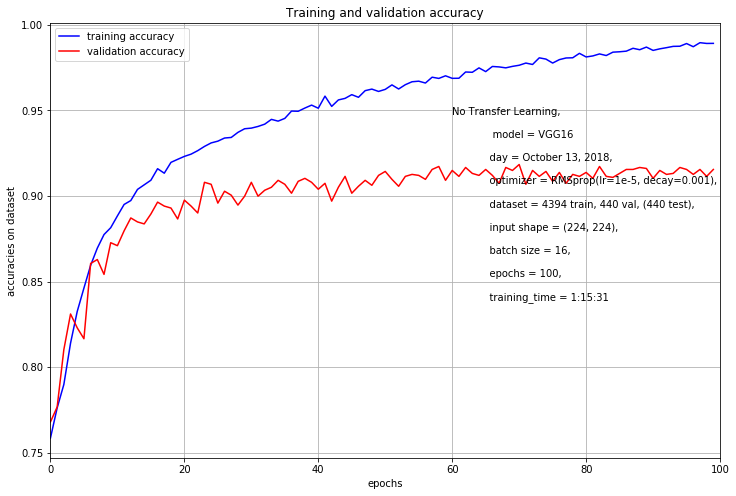

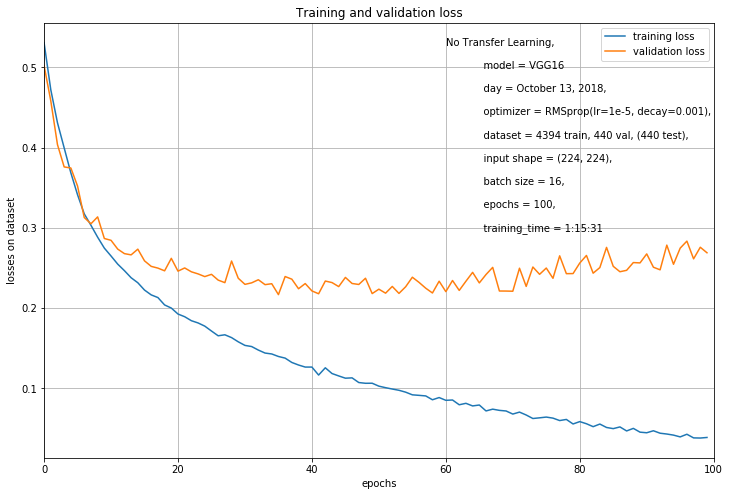

In [20]:
#PLOT THE ACCURACY AND LOSS FORM THE TRAINING AND VALIDATION SETS
fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history.history['acc'],label='training accuracy', color = "blue")
plt.plot(range(epochs),history.history['val_acc'],label='validation accuracy', color = "red")
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('accuracies on dataset')
plt.grid(True)
plt.title("Training and validation accuracy")
plt.text(epochs*.6, max(history.history['acc'])/(1.18),'''No Transfer Learning, \n 
             model = {} \n
            day = {}, \n
            optimizer = {}, \n
            dataset = {} train, {} val, ({} test), \n
            input shape = {}, \n
            batch size = {}, \n
            epochs = {}, \n
            training_time = {}'''.format(model_name,
                                  datetime.date.today().strftime("%B %d, %Y"),
                                  optim,
                                  nTrain, nVal, nTest,
                                  target_size, #input_shape,
                                  batch_size,
                                  epochs,
                                  str(datetime.timedelta(seconds=math.ceil(toc-tic)))))
plt.show()
fig.savefig('NO_TL_accuracy_{}_{}_{}img.jpg'.format(model_name,
                                                datetime.date.today().strftime("%B %d, %Y"),
                                                nTrain+nVal+nTest))
plt.close(fig)

fig = plt.figure(figsize=(12,8))
plt.plot(range(epochs),history.history['loss'],label='training loss')
plt.plot(range(epochs),history.history['val_loss'],label='validation loss')
plt.legend(loc=0)
plt.xlabel('epochs')
plt.xlim([0,epochs])
plt.ylabel('losses on dataset')
plt.grid(True)
plt.title("Training and validation loss")
plt.text(epochs*.6, max(history.history['loss'])/(1.8),'''No Transfer Learning, \n 
            model = {} \n
            day = {}, \n
            optimizer = {}, \n
            dataset = {} train, {} val, ({} test), \n
            input shape = {}, \n
            batch size = {}, \n
            epochs = {}, \n
            training_time = {}'''.format(model_name,
                                  datetime.date.today().strftime("%B %d, %Y"),
                                  optim,
                                  nTrain, nVal, nTest,
                                  target_size, #input_shape,
                                  batch_size,
                                  epochs,
                                  str(datetime.timedelta(seconds=math.ceil(toc-tic)))))
plt.show()
fig.savefig('NO_TL_loss_{}_{}_{}img.jpg'.format(model_name,
                                                datetime.date.today().strftime("%B %d, %Y"),
                                                nTrain+nVal+nTest))
plt.close(fig)

### Get the test data

In [24]:
# GET THE TEST DATASET AND AVALUATE THE MODELS
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(target_size[0], target_size[1]),
    batch_size=batch_size,
    class_mode='categorical')

Evaluate_history = model.evaluate_generator(test_generator,
                                            steps=None,
                                            max_queue_size=10,
                                            workers=1,
                                            use_multiprocessing=False,
                                            verbose=1)

Found 440 images belonging to 4 classes.
28/28 [==============================] - 1s 50ms/step


In [25]:
print(Evaluate_history)

[0.2510728093710813, 0.9142045454545454]


In [27]:
test_generator.reset()
score = model.predict_generator(test_generator,
                                          steps=None, 
                                          max_queue_size=10,
                                          workers=1,
                                          use_multiprocessing=False,
                                          verbose=1)

28/28 [==============================] - 1s 45ms/step


### See wich images were predicted wrongly

In [32]:
## PREDICT FOR TEST DATASET

#-Y_pred = model.predict(test_features)
Y_pred = score
print('\n PROBABILITIES')
print(Y_pred)

#y_pred = predicted_class_indices
y_pred = np.argmax(Y_pred, axis=1)

print('\n RESULTS')
print(y_pred)


 PROBABILITIES
[[9.7884357e-01 2.1155737e-02 7.3489150e-07 1.1209701e-08]
 [3.3469228e-03 1.8165120e-03 9.9422246e-01 6.1410887e-04]
 [1.7340526e-05 2.7100314e-16 7.5994842e-07 9.9998200e-01]
 ...
 [2.5805935e-01 4.7404342e-03 7.3718953e-01 1.0632057e-05]
 [1.0961391e-05 5.9939777e-07 9.9998736e-01 1.0841608e-06]
 [9.9955505e-01 4.0577226e-09 2.3357879e-05 4.2154978e-04]]

 RESULTS
[0 2 3 3 1 0 3 1 2 1 1 1 0 1 3 1 1 3 3 0 3 0 3 3 1 3 1 1 3 3 0 0 3 0 3 3 3
 0 3 0 2 0 3 0 1 2 1 2 3 0 2 2 3 3 0 3 3 2 1 0 1 3 1 2 0 2 3 2 3 0 3 2 0 0
 0 1 2 2 0 1 0 1 3 0 0 1 3 2 2 2 0 3 0 3 2 0 2 0 1 3 2 1 1 3 3 3 0 3 2 1 1
 1 0 0 2 2 0 2 1 1 0 2 3 2 0 2 1 3 1 0 1 2 1 3 0 2 3 0 0 2 2 3 3 0 0 3 0 3
 3 2 2 2 2 0 3 2 3 2 1 2 3 2 2 0 0 2 2 2 0 2 1 2 2 2 3 1 1 1 0 0 2 0 0 3 1
 3 2 2 1 1 2 2 2 3 0 1 2 0 2 1 0 0 1 3 1 0 0 2 1 0 2 2 3 2 1 3 1 3 0 1 0 2
 0 2 1 3 1 1 3 3 2 1 3 0 0 1 0 3 2 2 0 3 1 2 0 0 3 1 0 1 3 1 0 0 0 3 3 3 1
 0 3 3 3 2 2 3 3 3 2 3 0 0 1 0 0 1 0 1 3 1 1 2 3 1 1 0 2 1 0 2 2 3 3 0 1 2
 3 1 1 0 3 0 2

In [33]:
#ESTA PARTE ESTÁ A FUNCIONAR:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

In [34]:
#print(predictions)

In [35]:
filenames=test_generator.filenames

pprint.pprint(filenames)

results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
print(results)

#results.to_csv("results.csv",index=False)

results.to_csv('''No_TL_{}_{}_{}_{}img.csv'''.format(model_name,
                                                 datetime.date.today().strftime("%B %d, %Y"),
                                                 optim,
                                                 nTrain+nVal+nTest,
                                                 index=False))

['EOSINOPHIL/1.jpg',
 'EOSINOPHIL/10.jpg',
 'EOSINOPHIL/11.jpg',
 'EOSINOPHIL/2.jpg',
 'EOSINOPHIL/3.jpg',
 'EOSINOPHIL/4.jpg',
 'EOSINOPHIL/5.jpg',
 'EOSINOPHIL/6.jpg',
 'EOSINOPHIL/8.jpg',
 'EOSINOPHIL/9.jpg',
 'EOSINOPHIL/_0_4340.jpeg',
 'EOSINOPHIL/_10_29.jpeg',
 'EOSINOPHIL/_11_218.jpeg',
 'EOSINOPHIL/_12_8532.jpeg',
 'EOSINOPHIL/_13_656.jpeg',
 'EOSINOPHIL/_14_5344.jpeg',
 'EOSINOPHIL/_15_161.jpeg',
 'EOSINOPHIL/_16_2676.jpeg',
 'EOSINOPHIL/_17_5609.jpeg',
 'EOSINOPHIL/_18_6980.jpeg',
 'EOSINOPHIL/_19_9359.jpeg',
 'EOSINOPHIL/_1_3944.jpeg',
 'EOSINOPHIL/_20_3239.jpeg',
 'EOSINOPHIL/_21_5433.jpeg',
 'EOSINOPHIL/_22_7728.jpeg',
 'EOSINOPHIL/_23_2856.jpeg',
 'EOSINOPHIL/_24_348.jpeg',
 'EOSINOPHIL/_25_4956.jpeg',
 'EOSINOPHIL/_26_7864.jpeg',
 'EOSINOPHIL/_27_5401.jpeg',
 'EOSINOPHIL/_28_4449.jpeg',
 'EOSINOPHIL/_29_8854.jpeg',
 'EOSINOPHIL/_2_9956.jpeg',
 'EOSINOPHIL/_30_9308.jpeg',
 'EOSINOPHIL/_31_2093.jpeg',
 'EOSINOPHIL/_32_6110.jpeg',
 'EOSINOPHIL/_33_5305.jpeg',
 'EOSINOPHIL/_

In [37]:
# file2write=open('Test results_{}_#testexamples:{}_{}'.format(model_name,
#                                                                   len(Y_pred),
#                                                                   datetime.date.today().strftime("%B %d, %Y")),'w')
# file2write.write('Predicting on test data' + str(accuracy_score(test_labels, prediction)))
# file2write.write('EVALUATE FIRST IMAGE OF TEST DATASET')
# file2write.write("%s: %.2f%%" %(model.metrics_names[1], score[1]*100))
# file2write.write('Test Loss:{}'.format(score[0]))
# file2write.write('Test accuracy:{}'.format(score[1]))
# file2write.write(str(model.predict(test_image)))
# file2write.write(str(test_labels[0:1]))
# file2write.write('PREDICT FOR TEST DATASET')
# file2write.write('\n PROBABILITIES \n {}'.format(Y_pred))
# file2write.write('\n RESULTS \n {}'.format(y_pred))
# file2write.write('\n PRECISION, RECALL, SCORE \n' + classification_report(np.argmax(test_labels,axis=1), y_pred,target_names=target_names))
# file2write.write('\n CONFUSION MATRIX \n {}'.format(confusion_matrix(np.argmax(test_labels,axis=1), y_pred)))
# file2write.close()

In [38]:
 keras.backend.clear_session()